# LeNet Architecture

In [1]:
import os
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Dense, Flatten, Input
from tensorflow.keras.activations import tanh, sigmoid
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.preprocessing import MultiLabelBinarizer

## LeNet model

In [2]:
leNet = Sequential()

# input layer
leNet.add(Input(shape=(56, 56, 3), name='input_layer'))

# convolution 1
leNet.add(Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), padding='same', activation=tanh, name='conv_5x5_1'))

# subsampling (Avg. pool)
leNet.add(AveragePooling2D(pool_size=(2, 2)))

# convolution 2
leNet.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), padding='valid', activation=tanh, name='conv_5x5_2'))

# subsampling (Avg. pool)
leNet.add(AveragePooling2D(pool_size=(2, 2)))

# convolution 3
leNet.add(Conv2D(filters=120, kernel_size=(5, 5), strides=(1, 1), padding='valid', activation=tanh, name='conv_5x5_3'))

# flatten
leNet.add(Flatten())

# classifier
leNet.add(Dense(units=84, activation=tanh, name='fully_con_1'))

# output layer
leNet.add(Dense(units=42, activation=sigmoid, name='output_layer'))

leNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_5x5_1 (Conv2D)         (None, 56, 56, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 28, 28, 6)        0         
 ooling2D)                                                       
                                                                 
 conv_5x5_2 (Conv2D)         (None, 24, 24, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 12, 12, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv_5x5_3 (Conv2D)         (None, 8, 8, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 7680)              0

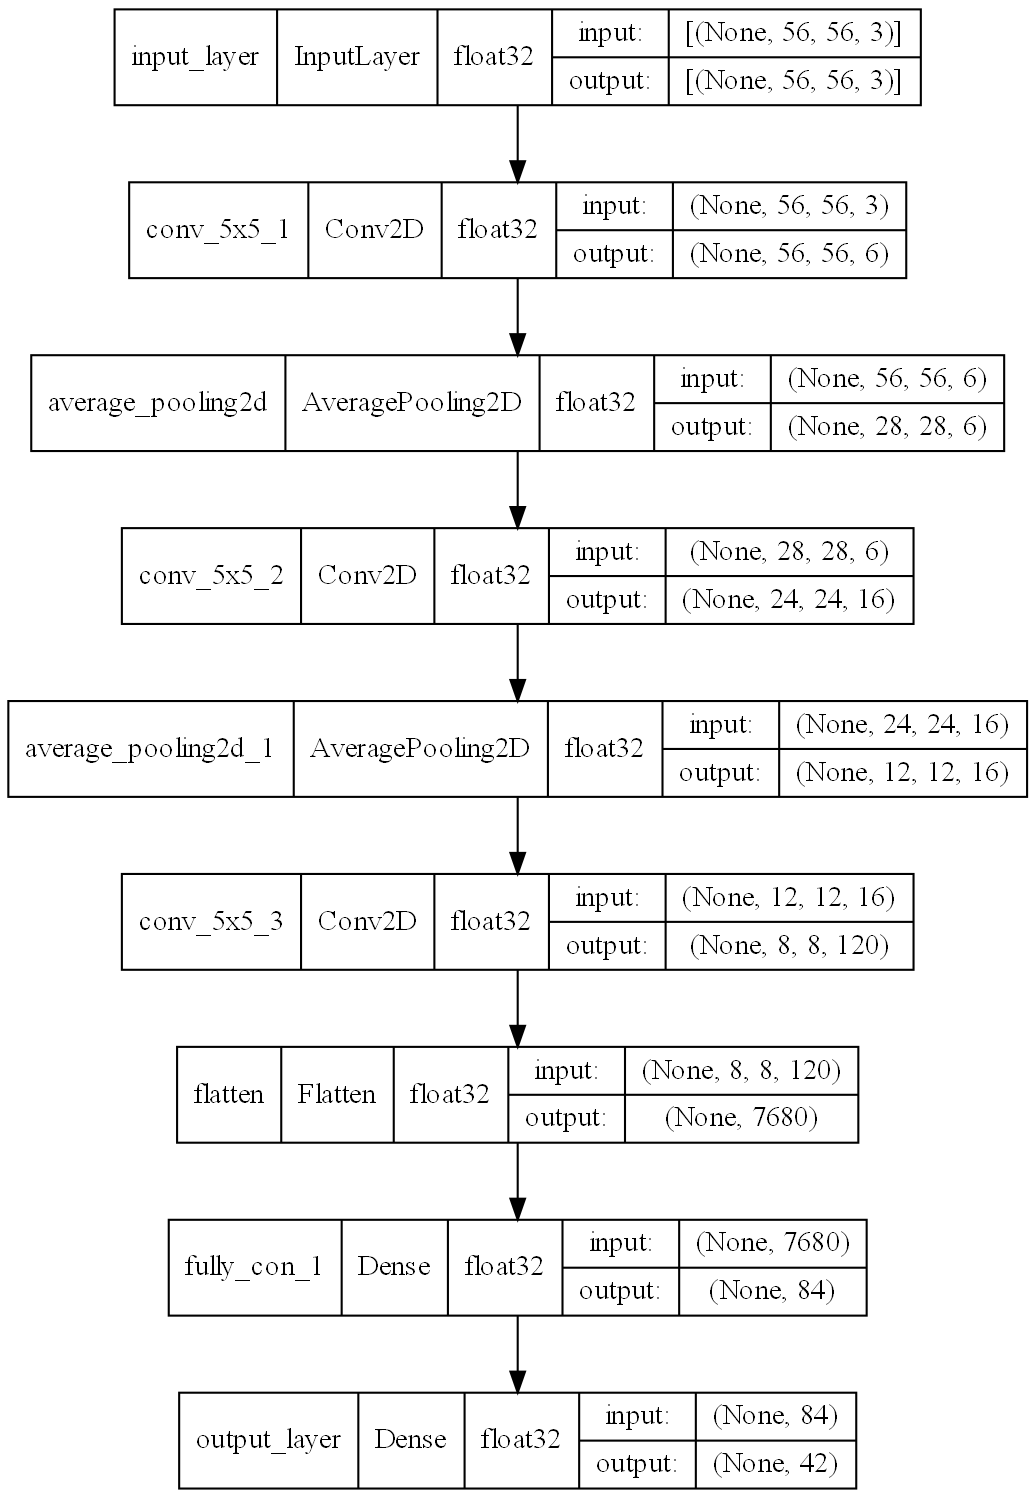

In [3]:
plot_model(model=leNet,
           to_file='LeNet.png',
           show_shapes=True,
           show_dtype=True,
           show_layer_names=True,
           dpi=150)

#### learning rate schedule in LeNet

In [4]:
def lr_schedule(epoch):
    if epoch <= 2:
        lr = 5e-4
    elif 2 < epoch <= 5:
        lr = 2e-4
    elif 5 < epoch <= 9:
        lr = 5e-5
    else:
        lr = 1e-5

    return lr

In [5]:
lr_scheduler = LearningRateScheduler(lr_schedule)
check_point = ModelCheckpoint(filepath='LeNet.hdf5',
                              monitor='val_loss',
                              save_best_only=True)

callbacks = [lr_scheduler, check_point]

In [6]:
leNet.compile(optimizer=SGD(),
              loss=binary_crossentropy,
              metrics=['accuracy'])

In [7]:
tree_types = os.listdir('../../data/image data/train')
X = []
y = []
val_x = []
val_y = []

for tree in tree_types:
    tree_path = os.path.join('../../data/image data/train', tree)
    tree_disease_types = os.listdir(tree_path)

    for disease in tree_disease_types:
        img_name = os.listdir(os.path.join(tree_path, disease))

        for img in img_name:
            image_path = os.path.join(tree_path, disease, img)
            image = img_to_array(load_img(image_path, target_size=(56, 56)))
            X.append(image)
            y.append([tree, disease])

for tree in tree_types:
    tree_path = os.path.join('../../data/image data/validation', tree)
    tree_disease_types = os.listdir(tree_path)

    for disease in tree_disease_types:
        img_name = os.listdir(os.path.join(tree_path, disease))

        for img in img_name:
            image_path = os.path.join(tree_path, disease, img)
            image = img_to_array(load_img(image_path, target_size=(56, 56)))
            val_x.append(image)
            val_y.append([tree, disease])


In [8]:
X = np.asarray(X)
val_x = np.asarray(val_x)
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y)
val_y = mlb.transform(val_y)
generator = ImageDataGenerator(rescale=1. / 255)

In [9]:
X.shape, y.shape, val_x.shape, val_y.shape

((38966, 56, 56, 3), (38966, 42), (9427, 56, 56, 3), (9427, 42))

In [10]:
train_gen = generator.flow(X, y, batch_size=32)
val_gen = generator.flow(val_x, val_y, batch_size=32)

#### training

In [ ]:
leNet_history = leNet.fit(train_gen,
                          batch_size=32,
                          epochs=20,
                          callbacks=callbacks,
                          validation_data=val_gen)

Epoch 1/20
1218/1218 [==============================] - 25s 14ms/step - loss: 0.5836 - accuracy: 0.0203 - val_loss: 0.4261 - val_accuracy: 0.0101 - lr: 5.0000e-04
Epoch 2/20
1218/1218 [==============================] - 17s 14ms/step - loss: 0.3612 - accuracy: 0.0097 - val_loss: 0.3212 - val_accuracy: 0.0056 - lr: 5.0000e-04
Epoch 3/20
1218/1218 [==============================] - 16s 13ms/step - loss: 0.3012 - accuracy: 7.1858e-04 - val_loss: 0.2828 - val_accuracy: 4.2431e-04 - lr: 5.0000e-04
Epoch 4/20
1218/1218 [==============================] - 17s 14ms/step - loss: 0.2782 - accuracy: 2.3097e-04 - val_loss: 0.2719 - val_accuracy: 5.3039e-04 - lr: 2.0000e-04
Epoch 5/20
1218/1218 [==============================] - 17s 14ms/step - loss: 0.2681 - accuracy: 0.0014 - val_loss: 0.2626 - val_accuracy: 0.0052 - lr: 2.0000e-04
Epoch 6/20
 716/1218 [================>.............] - ETA: 5s - loss: 0.2611 - accuracy: 0.0114